In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
user = pd.read_csv("user.csv")
movies = pd.read_csv("movies.csv")

In [4]:
user.head(3)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [5]:
movies.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [7]:
df = pd.merge(user, movies, on = "item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.drop("timestamp", axis = 1, inplace = True)

In [11]:
df["item_id"].value_counts().sort_values(ascending = False)

item_id
50      584
258     509
100     508
181     507
294     485
       ... 
1682      1
1659      1
1645      1
1626      1
1641      1
Name: count, Length: 1682, dtype: int64

In [12]:
df["item_id"].value_counts()>=100

item_id
50       True
258      True
100      True
181      True
294      True
        ...  
852     False
1505    False
1653    False
1452    False
1641    False
Name: count, Length: 1682, dtype: bool

In [19]:
new_df = df[df["item_id"].isin(df["item_id"].value_counts()[df["item_id"].value_counts()>=100].index)]

In [20]:
new_df["item_id"].value_counts()

item_id
50      584
258     509
100     508
181     507
294     485
       ... 
708     101
682     100
1012    100
381     100
665     100
Name: count, Length: 338, dtype: int64

In [21]:
new_df


,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
93442,820,358,1,Spawn (1997)
93443,397,358,2,Spawn (1997)
93444,827,358,2,Spawn (1997)
93445,757,358,3,Spawn (1997)


In [22]:
new_df["rating"].unique()

array([5, 4, 2, 3, 1])

In [23]:
new_df["rating"].mean()

3.699962975532998

<function matplotlib.pyplot.show(close=None, block=None)>

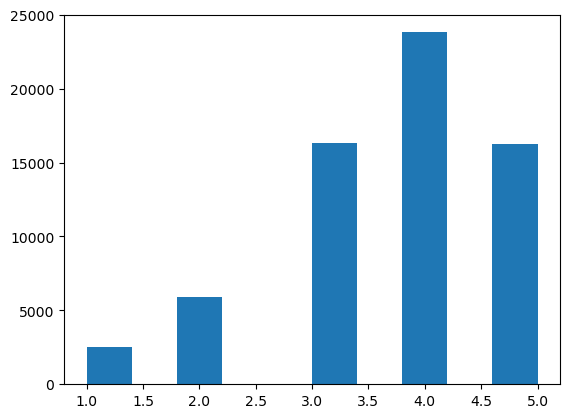

In [24]:
plt.hist(new_df["rating"])
plt.show

In [25]:
movie_title = new_df.groupby("item_id")

In [26]:
movie_title["rating"].mean()

item_id
1       3.878319
2       3.206107
4       3.550239
7       3.798469
8       3.995434
          ...   
928     3.115385
1012    3.530000
1016    3.459854
1028    3.040541
1047    2.835821
Name: rating, Length: 338, dtype: float64

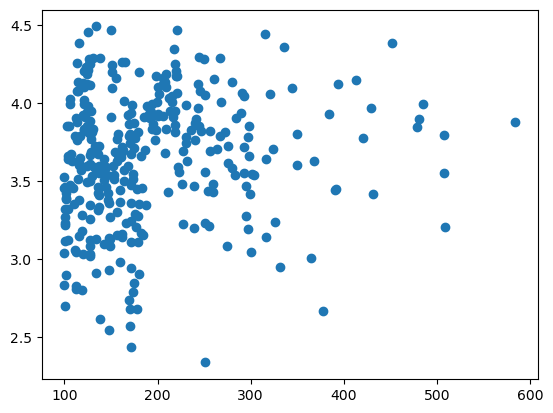

In [27]:
plt.scatter(new_df["item_id"].value_counts(),movie_title["rating"].mean())
plt.show()

In [28]:
import seaborn as sns

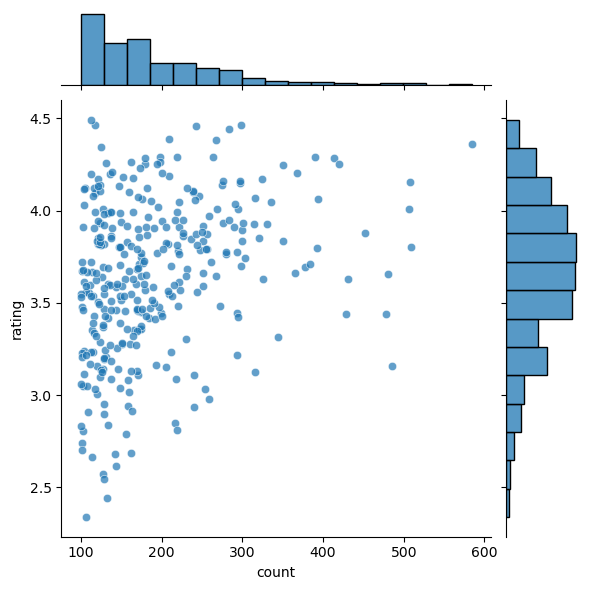

In [29]:
sns.jointplot(new_df, x=new_df["item_id"].value_counts(), y = movie_title["rating"].mean(), alpha=0.7)
plt.show()

In [31]:
movie_matrix = pd.pivot_table(new_df, columns = "title", index="user_id", values = "rating", fill_value=0)

In [32]:
movie_corr = movie_matrix.corr(method = "pearson")

In [37]:
movie_title ="Star Wars (1977)"

In [38]:
similar_movie = movie_corr[movie_title]

In [39]:
data = {"Title": similar_movie.index, "Similarity":similar_movie.values}

In [40]:
similar_Star_War = pd.DataFrame(data)

In [41]:
similar_Star_War.sort_values("Similarity",ascending=False).head()

,Title,Similarity
294,Star Wars (1977),1.000000
254,Return of the Jedi (1983),0.746797
99,"Empire Strikes Back, The (1980)",0.555233
246,Raiders of the Lost Ark (1981),0.540455
161,Indiana Jones and the Last Crusade (1989),0.467523
